# Decision Trees Practice Prob


In this exercise you will use the wine dataset to classify 3 classes of wines using some real valued features and perform multiclass classification.  

### Things to do:
1. Load the dataset
2. Split the dataset into train/test/validation sets ( suggested: 60%, 20%, 20% )
3. Fit a DecisionTree to the dataset
4. Tune the `min_samples_split` parameter to find the best fit


In [ ]:
# !gdown --id 1WA0I2LdXT_v0GqyYQ6b92ad7cHm_fmUT

Downloading...
From: https://drive.google.com/uc?id=1WA0I2LdXT_v0GqyYQ6b92ad7cHm_fmUT
To: /content/wine_original.csv
100% 11.6k/11.6k [00:00<00:00, 17.1MB/s]


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from IPython.display import Image  

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns

# import other libraries as needed

### Data Description
1. Multiclass classification problem with 3 labels: $\{1,2,3\}$ representing 3 different cultivators
2. 13 continuous attributes describing the properties of wine like _'Alcohol'_, _'Malic Acid'_ etc.
3. UCI Machine Learning Repository

In [32]:
# Load the wine dataset
data = pd.read_csv('res/wine_original.csv')
labels = data['class']
del data['class'] # why are we deleting 'class' column?

# Create training and test sets
# It is very important to shuffle data before performing the split
# The train and test sets should contain a good mix of all kinds of examples
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
# train_test_split() function shuffles data before splitting by default

API references:  
`pandas.read_cv()` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html  
`train_test_split()` : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:

def visualizeTree(clf, feature_names, target_names):
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    return graph.create_png()

# to visualize a tree perform the following call:
# Image(visualizeTree(<classifier object>, <features names as array>, <target names as array>))




## Decision Tree Classifier

In [33]:
## Your Code Here
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print ('accuracy = ' + str(accuracy_score(y_test, predictions)))

accuracy = 0.6944444444444444


In [44]:
targetNames = pd.read_csv('res/wine_original.csv')['class']
targetNames = [str(i) for i in targetNames]

featureNames = pd.read_csv('res/wine_original.csv').columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [ ]:
visualizeTree(clf, feature_names=featureNames, target_names=targetNames)

[Text(0.625, 0.875, 'Proline <= 875.0\nentropy = 1.557\nsamples = 113\nvalue = [37, 47, 29]\nclass = 1'),
 Text(0.5, 0.625, 'Color intensity <= 4.79\nentropy = 1.198\nsamples = 80\nvalue = [4, 47, 29]\nclass = 1'),
 Text(0.25, 0.375, 'Color intensity <= 3.46\nentropy = 0.49\nsamples = 49\nvalue = [2, 45, 2]\nclass = 1'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = 1'),
 Text(0.375, 0.125, 'entropy = 1.198\nsamples = 13\nvalue = [2, 9, 2]\nclass = 1'),
 Text(0.75, 0.375, 'Hue <= 0.72\nentropy = 0.684\nsamples = 31\nvalue = [2, 2, 27]\nclass = 1'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21]\nclass = 1'),
 Text(0.875, 0.125, 'entropy = 1.371\nsamples = 10\nvalue = [2, 2, 6]\nclass = 1'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 1')]

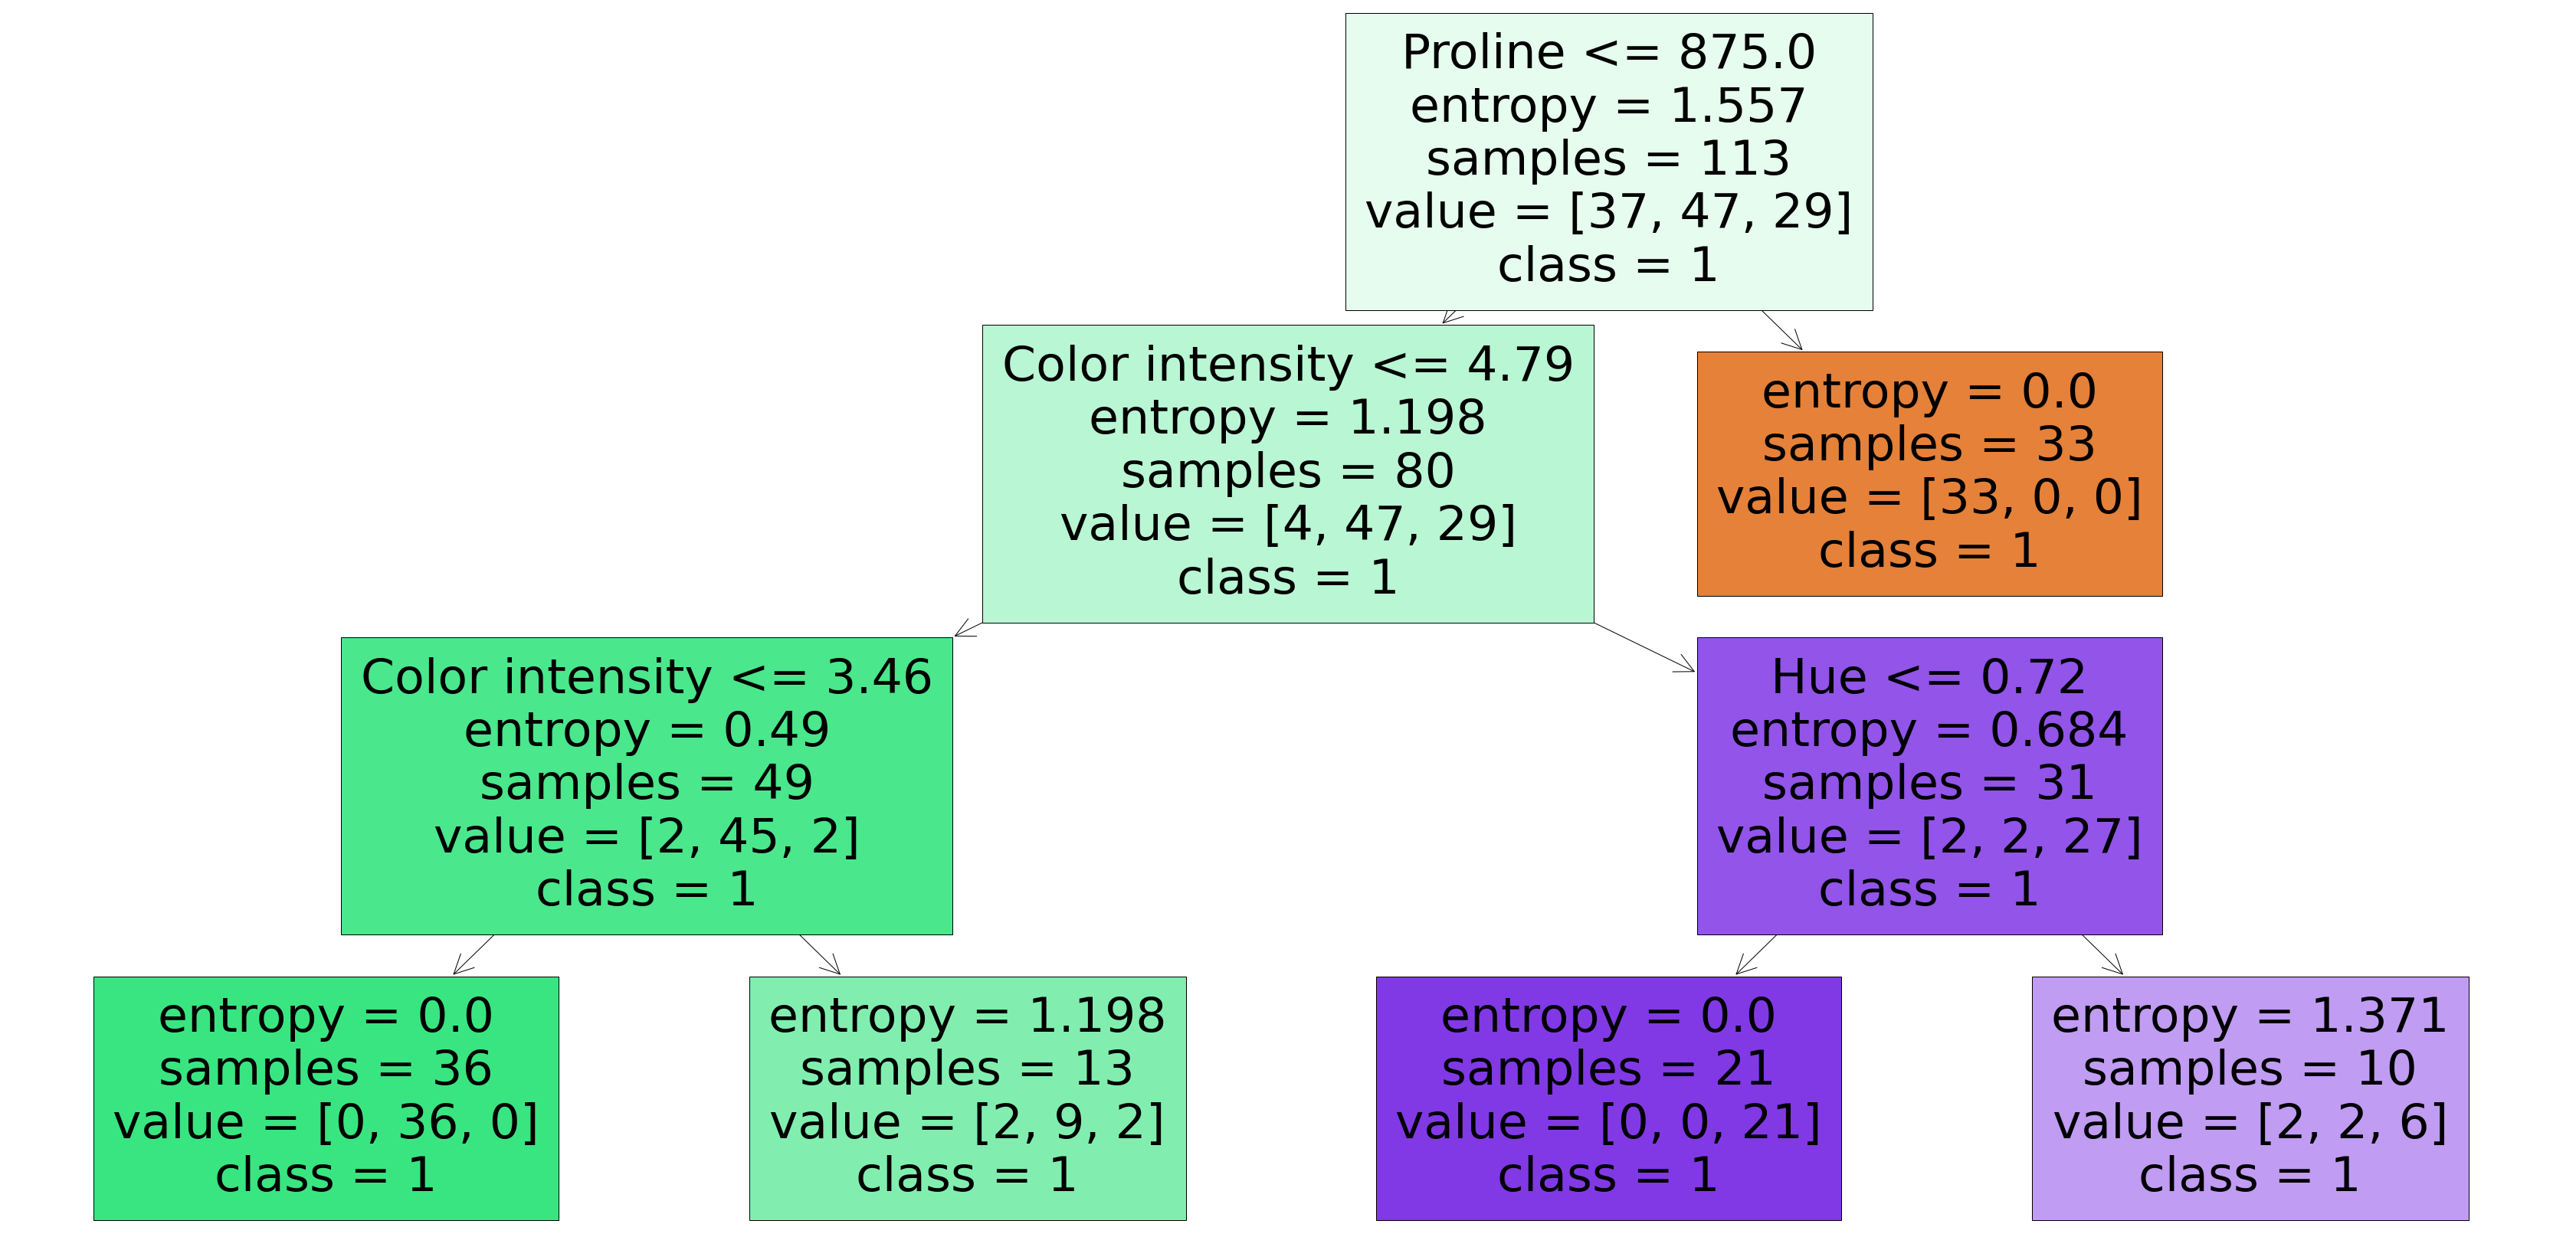

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(clf, feature_names=featureNames, class_names=targetNames, filled=True)

In [ ]:
# Min Sample Split
# Read as 'minimum samples at a node to consider for splitting'